In [1]:
# Check that we reach the target depths of g ∼ 27.6, matching the r ∼27.1 and i ∼26.4 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

In [2]:
names = ['name', 'ra', 'dec', 'MB', 'mm', 'd', 'rv1', 'rv2']
types = ['|U7', float, float, float, float, float, float,float]
gals = np.genfromtxt('gals.dat', dtype=list(zip(names, types)))

In [3]:
ra = np.concatenate([[0], gals['ra']*360/24.])
dec = np.concatenate([[0], gals['dec']])

In [4]:
conn = maf.db.OpsimDatabase('local_gal_v2.0_10yrs.db')
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)
name='local_gal'

In [5]:
bundleList = []

for filtername in 'gri':

    # col here could be anything
    metric = maf.metrics.Coaddm5Metric()
    # Select all the visits. Could do something like 'filter="r"' 
    sql = 'filter="%s"' % filtername
    slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
    plotDict = {}
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name, plotDict=plotDict))


Querying database observations with constraint filter="i" for columns ['fieldDec', 'rotSkyPos', 'fiveSigmaDepth', 'fieldRA']
Found 471243 visits
Running:  ['local_gal_CoaddM5_i_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter="r" for columns ['fieldDec', 'rotSkyPos', 'fiveSigmaDepth', 'fieldRA']
Found 465661 visits
Running:  ['local_gal_CoaddM5_r_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter="g" for columns ['fieldDec', 'rotSkyPos', 'fiveSigmaDepth', 'fieldRA']
Found 223463 visits
Running:  ['local_gal_CoaddM5_g_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.
Plotting complete.
Plotting figures with "filter="r"" constraint now.
Plotting complete.
Plotting figures with "filter="g

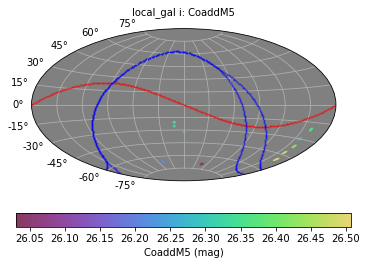

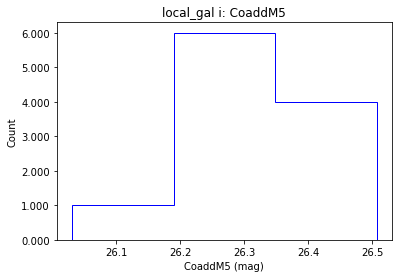

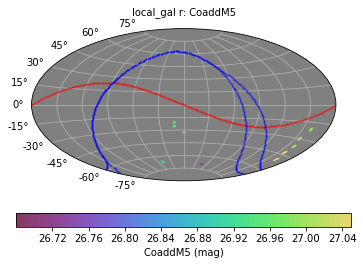

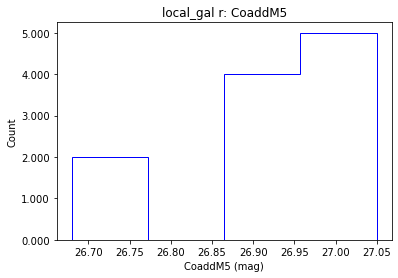

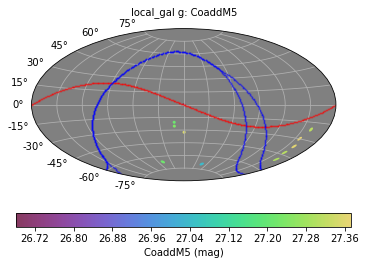

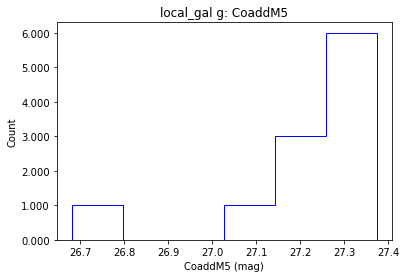

In [6]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)


In [7]:
bundleList[0].metricValues

masked_array(data=[26.681428166467903, 27.20861939898789,
                   27.235020133828705, 27.215640422735554,
                   27.297659378735926, 27.312011294453896,
                   27.3646889843798, 27.310538848430422,
                   27.372973804976336, 27.035372163648496,
                   27.348763858280215],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)

In [8]:
bundleList[1].metricValues

masked_array(data=[26.680244085327985, 26.94628315084244,
                   26.952340951882718, 26.90492007297607,
                   27.04669443758616, 26.996215310069445,
                   27.008205611752057, 27.049772058100277,
                   27.026486028623054, 26.725015259623813,
                   26.95125904201106],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)

In [9]:
bundleList[2].metricValues

masked_array(data=[26.198616146693485, 26.343321246129282,
                   26.31435584457111, 26.217458246890292,
                   26.507135049826708, 26.358335330655027,
                   26.424680206494493, 26.468012736423038,
                   26.281920038696157, 26.031097946135194,
                   26.256650824044748],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)